Activity 2.6 -- Working with COVID 19 and World Bank Data
=========================================================

In this activity, you will explore relationships between various World
Bank indicators for countries and their corresponding COVID death rates.
First you need to download data on COVID-19 (see links and instructions
below) and the selected indicators from the Open World Bank data
available at <https://data.worldbank.org>.

**COVID data set source:** <https://coviddata.github.io/coviddata/#csvs>

**Tasks.** Use pandas and dfply to perform each of the following.

1.  Download the raw **time\_series\_covid19\_confirmed\_global.csv**
    dataset.

2.  Inspect the data and discuss the need to reshape. 

In [279]:
import numpy as np
import pandas as pd
from dfply import *


In [280]:
# Code for loading and inspecting the CSV file

covid_confirmed = pd.read_csv('./data/time_series_covid19_confirmed_global.csv')


In [281]:
covid_confirmed 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,193912,194163,194355,194614,195012,195298,195471,195631,195925,196182
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330062,330193,330221,330283,330516,330687,330842,330948,331036,331053
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,270426,270443,270461,270476,270489,270507,270522,270532,270539,270551
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46027,46027,46027,46027,46113,46113,46113,46113,46113,46113
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,702332,702332,702332,702591,702591,702591,702591,702591,702591,702591
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11926,11931,11931,11931,11931,11932,11932,11932,11932,11932
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332822,333074,333086,333124,333150,333180,333204,333220,333229,333234


> Discussion:

3.  Write a single pipe that reshapes the data, sets the dtype of the date column, and extracts various date parts.
    1. To change the `dtype` of the date column, `date = X.date.astype('datetime64')`
    2. To extract the year and month, use the `X.date.dt.year` and `X.date.dt.month` attributes. This will need to happen in a separate `mutate` 

In [282]:
# your code here

covid_confirmed_stacked = (covid_confirmed 
        >> gather('date', 'Measurement', columns_from('1/22/20'))
        >> mutate(date = X.date.astype('datetime64'))
        >> filter_by(~X.Measurement.isna())
        >> mutate(year = X.date.dt.year, month=X.date.dt.month)
)


### World Bank Links Development Indicators

<https://databank.worldbank.org/source/world-development-indicators>

#### Constructing a data set.

First you need to construct a data set as follows

1.  Expand the Country tab and select all.

<img src="./img/media/image1.png" width="300">

2.  Click on the Series tab, search for *Health* and select the
    following indicators. **Feel free to add additional indicators!**

<img src="img/media/image2.png" width="300">

3.  Click on the Time tab and select 2020 and 2021.

4.  Click apply changes in the floating dialog.

<img src="img/media/image3.png" width="300">

5.  Select CSV from the Download Options button and save the data folder

<img src="img/media/image4.png" width="100">

#### Tasks

Use pandas and dfply to perform each of the following.

1.  Inspect the World Bank data and discuss the need to reshape. 

**Hints:** 

* You should apply `fix_names` from `more_dfply` to clean up the column names.
* This table needs to be reshaped twice




In [283]:
# Code for loading and inspecting the CSV
world_bank = pd.read_csv('./data/WorldBankData.csv')

In [284]:
world_bank

,Country Name,Country Code,Series Name,Series Code,2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,14.12674332,13.24220181
1,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,69.99860382,65.80603027
2,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,0.54922014,1.08443093
3,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.PC.CD,2.72140895,5.38899046
4,Afghanistan,AFG,Domestic private health expenditure (% of curr...,SH.XPD.PVTD.CH.ZS,76.319664,79.39915466
...,...,...,...,...,...,...
1596,NaN,NaN,NaN,NaN,NaN,NaN
1597,NaN,NaN,NaN,NaN,NaN,NaN
1598,NaN,NaN,NaN,NaN,NaN,NaN
1599,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN


In [285]:
from more_dfply import *

In [286]:
world_bank_stacked = (world_bank
        >> fix_names
        >> rename(YR2018 = X._2018_YR2018, YR2019 = X._2019_YR2019)
        >> gather('Year', 'Measurement', columns_from('YR2018'), add_id = True)
        >> filter_by(~X.Measurement.isna()) 
        >> spread(X.Series_Name, X.Measurement)
)

In [287]:
world_bank_stacked

,Country_Name,Country_Code,Series_Code,_ID,Year,Current health expenditure (% of GDP),Current health expenditure per capita (current US$),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure per capita (current US$),Domestic private health expenditure (% of current health expenditure),Domestic private health expenditure per capita (current US$)
0,Afghanistan,AFG,SH.XPD.CHEX.GD.ZS,0,YR2018,14.12674332,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SH.XPD.CHEX.GD.ZS,0,YR2019,13.24220181,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,SH.XPD.CHEX.PC.CD,1,YR2018,NaN,69.99860382,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,SH.XPD.CHEX.PC.CD,1,YR2019,NaN,65.80603027,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,SH.XPD.GHED.GD.ZS,2,YR2018,NaN,NaN,0.54922014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3187,Zimbabwe,ZWE,SH.XPD.GHED.PC.CD,1299,YR2019,NaN,NaN,NaN,18.16564219,NaN,NaN
3188,Zimbabwe,ZWE,SH.XPD.PVTD.CH.ZS,1300,YR2018,NaN,NaN,NaN,NaN,42.76859662,NaN
3189,Zimbabwe,ZWE,SH.XPD.PVTD.CH.ZS,1300,YR2019,NaN,NaN,NaN,NaN,52.81442505,NaN
3190,Zimbabwe,ZWE,SH.XPD.PVTD.PC.CD,1301,YR2018,NaN,NaN,NaN,NaN,NaN,60.46166901


> **Your discussion:**

2.  Write a single pipe that reshapes the data, sets the dtype of the date column, and extracts various date parts.
    1. You can use the `replace` method to clean up the year column.  See lecture 3.1 for details.

In [288]:
# your code here


world_bank_stacked.Year = world_bank_stacked.Year.str.replace('YR','')


### Investigate joining on country

Before we can proceed, we need to make sure that the columns used to join the data--namely the country--actually match.  Do this by

1. For each table, select just the country columns and make sure the column names match.
2. Perform a full outer join and filter on rows that didn't match (i.e. with a missing value in either column).
3. Determine any transformations needed to make the entries match.
4. Transform each of the original table as need (column names and/or problematic entries.

In [289]:
# Your code here
covid_countries = (covid_confirmed_stacked
                >> select(X['Country/Region'])
                >> rename(country = 'Country/Region')
                >> mutate(file = 'covid')
                >> distinct
)


In [290]:
world_bank_countries = (world_bank_stacked
                >> select('Country_Name')
                >> rename(country = 'Country_Name')
                >> mutate(file = 'world_bank')
                >> distinct
)

In [291]:
joined = covid_countries >> outer_join(world_bank_countries, by='country')
joined.head(5)

,country,file_x,file_y
0,Afghanistan,covid,world_bank
1,Albania,covid,world_bank
2,Algeria,covid,world_bank
3,Andorra,covid,world_bank
4,Angola,covid,world_bank


In [292]:
set_diff = (joined 
>> filter_by(X.country.notna())
>> filter_by(X.file_x.isna() | X.file_y.isna())
>> distinct 
>> arrange(X.country)
)

In [293]:
# set_diff.to_csv('./data/set_diff.csv')

Alternatively, we can use a more "pythonic" way to find the set of diff by using set. It can make our code much shorter.

In [294]:
cv_countries = set(covid_confirmed_stacked['Country/Region'])
wb_countries = set(world_bank_stacked.Country_Name)
diff1 = list(cv_countries - wb_countries)
diff2 = list(wb_countries - cv_countries)
diff_total = set(diff1+diff2)
diff_total_str = [str(i) for i in diff_total]
# len(diff1 + diff2)
sorted_diff = sorted(diff_total_str)

In [295]:

country_dict = {"Bahamas, The" : "Bahamas", "Brunei Darussalam" : "Brunei", "Congo, Dem. Rep." : "Congo (Kinshasa)", "Congo, Rep." : "Congo (Brazzaville)", "Czech Republic" : "Czechia", "Egypt, Arab Rep." : "Egypt", 
"Gambia, The" : "Gambia", "Iran, Islamic Rep." : "Iran", "Korea, Dem. People's Rep." : "Korea, North", "Korea, Rep." : "Korea, South", "Kyrgyz Republic" : "Kyrgyzstan", "Lao PDR" : "Laos", "Myanmar" : "Burma",
"Russian Federation" : "Russia", "Slovak Republic" : "Slovakia", "Syrian Arab Republic" : "Syria", "Turkiye" : "Turkey", "United States" : "US", "Venezuela, RB" : "Venezuela", "Yemen, Rep." : "Yemen"}

In [296]:
world_bank_stacked = world_bank_stacked.replace({'Country_Name' : country_dict})

## Join and visualize 

Finally, you should use pandas and dfply to join these two data sets together, then create some interesting visualization using seaborn.

In [297]:
covid_confirmed_stacked = covid_confirmed_stacked.rename(columns = {'Country/Region' : 'Country_Name'})
covid_confirmed_stacked['Country_Name'] = covid_confirmed_stacked['Country_Name'].apply(str)
world_bank_stacked['Country_Name'] = world_bank_stacked_2019['Country_Name'].apply(str)

In [298]:
covid_confirmed_stacked

,Province/State,Country_Name,Lat,Long,date,Measurement,year,month
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,2020,1
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,2020,1
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,2020,1
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,2020,1
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,2020,1
...,...,...,...,...,...,...,...,...
275020,NaN,West Bank and Gaza,31.952200,35.233200,2022-09-12,702591,2022,9
275021,NaN,Winter Olympics 2022,39.904200,116.407400,2022-09-12,535,2022,9
275022,NaN,Yemen,15.552727,48.516388,2022-09-12,11932,2022,9
275023,NaN,Zambia,-13.133897,27.849332,2022-09-12,333234,2022,9


In [299]:
world_bank_stacked_2019 = world_bank_stacked[world_bank_stacked.Year == '2019']

In [300]:
# Your code here
final_joined = covid_confirmed_stacked >> left_join(world_bank_stacked_2019, by='Country_Name')
final_joined.sample(5)

,Province/State,Country_Name,Lat,Long,date,Measurement,year,month,Country_Code,Series_Code,_ID,Year,Current health expenditure (% of GDP),Current health expenditure per capita (current US$),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure per capita (current US$),Domestic private health expenditure (% of current health expenditure),Domestic private health expenditure per capita (current US$)
1150119,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2021-12-16,83,2021,12,GBR,SH.XPD.GHED.PC.CD,1233.0,2019,NaN,NaN,NaN,3427.36779151,NaN,NaN
653494,NaN,Sweden,60.128161,18.643501,2021-02-19,631166,2021,2,SWE,SH.XPD.PVTD.PC.CD,1127.0,2019,NaN,NaN,NaN,NaN,NaN,857.24921621
1383399,NaN,Trinidad and Tobago,10.691800,-61.222500,2022-05-06,150481,2022,5,TTO,SH.XPD.CHEX.GD.ZS,1176.0,2019,7.02007389,NaN,NaN,NaN,NaN,NaN
248850,NaN,Cuba,21.521757,-77.781167,2020-06-20,2309,2020,6,CUB,SH.XPD.PVTD.PC.CD,299.0,2019,NaN,NaN,NaN,NaN,NaN,109.23618403
1273566,NaN,Iceland,64.963100,-19.020800,2022-03-01,133211,2022,3,ISL,SH.XPD.PVTD.CH.ZS,532.0,2019,NaN,NaN,NaN,NaN,17.11121368,NaN


In [301]:
final_joined.tail(5)

,Province/State,Country_Name,Lat,Long,date,Measurement,year,month,Country_Code,Series_Code,_ID,Year,Current health expenditure (% of GDP),Current health expenditure per capita (current US$),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure per capita (current US$),Domestic private health expenditure (% of current health expenditure),Domestic private health expenditure per capita (current US$)
1597070,NaN,Zimbabwe,-19.015438,29.154857,2022-09-12,256888,2022,9,ZWE,SH.XPD.CHEX.PC.CD,1297.0,2019,NaN,103.02827223,NaN,NaN,NaN,NaN
1597071,NaN,Zimbabwe,-19.015438,29.154857,2022-09-12,256888,2022,9,ZWE,SH.XPD.GHED.GD.ZS,1298.0,2019,NaN,NaN,1.35826993,NaN,NaN,NaN
1597072,NaN,Zimbabwe,-19.015438,29.154857,2022-09-12,256888,2022,9,ZWE,SH.XPD.GHED.PC.CD,1299.0,2019,NaN,NaN,NaN,18.16564219,NaN,NaN
1597073,NaN,Zimbabwe,-19.015438,29.154857,2022-09-12,256888,2022,9,ZWE,SH.XPD.PVTD.CH.ZS,1300.0,2019,NaN,NaN,NaN,NaN,52.81442505,NaN
1597074,NaN,Zimbabwe,-19.015438,29.154857,2022-09-12,256888,2022,9,ZWE,SH.XPD.PVTD.PC.CD,1301.0,2019,NaN,NaN,NaN,NaN,NaN,54.41378962


Text(0.5, 1.0, 'Confirmed cases time series')

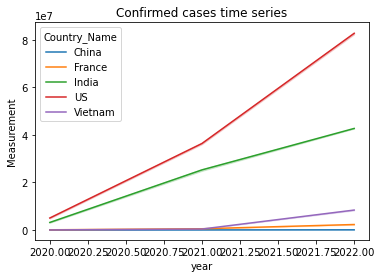

In [303]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.lineplot(x='year', y='Measurement', hue='Country_Name', 
             data= final_joined [ final_joined.Country_Name.isin(['US', 'China', 'India', 'France', 'Vietnam']) ] ).set_title('Confirmed cases time series')


Text(0.5, 1.0, 'Confirmed cases by months')

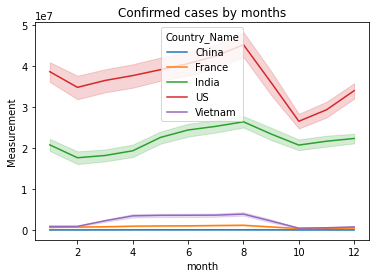

In [304]:
sns.lineplot(x='month', y='Measurement', hue='Country_Name', 
             data= final_joined [ final_joined.Country_Name.isin(['US', 'China', 'India', 'France', 'Vietnam']) ] ).set_title('Confirmed cases by months')

### Deliverables
To complete this part of the activity, you need to submit the following.

1.  A link to this notebook including all discussion and code requests
    above.

2.  A csv file containing your final dataset. **Hint.** You can use the
    to\_csv method on the final data frame.

In [ ]:
# Code for writing the data here